In [1]:
import pandas as pd
import numpy as np
import xarray as xr
import datetime as dt
import matplotlib.pyplot as plt

In [2]:
sites = ['mantua','west','water',"staten"]
df_sites = pd.DataFrame(data=sites,columns=["site"])
df_sites["lat"] = [39.766038926962466,41.13935584322975,39.75493159954764,40.56370693680991]
df_sites["lon"] = [-75.14202657295235,-73.52551929903115,-74.88289845779185, -74.19116380736966]
df_sites

,site,lat,lon
0,mantua,39.766039,-75.142027
1,west,41.139356,-73.525519
2,water,39.754932,-74.882898
3,staten,40.563707,-74.191164


In [51]:
### Process ERA5 PV Data
## mantua
xr_list = []
for year in [2021,2022]:
    for month in range(1,13):
        year = str(year)
        month=str(month)
        try:
            xr_list.append(xr.open_dataset("data/downloads/mantua_"+year+"_"+month+".nc"))
        except:
            print("end")
mantua_pv = xr.concat(xr_list,dim="time")

input_mantua_pt = mantua_pv.sel(expver=5,time=(pd.to_datetime(mantua_pv.time) >= dt.datetime(day=21,month=4,year=2021,hour=17))&(pd.to_datetime(mantua_pv.time) < dt.datetime(day=1,month=8,year=2022)))
input_mantua_pt = input_mantua_pt.rename({"latitude":"lat","longitude":"lon"})[["time", "lat", "lon","ssrd","tcc","t2m"]]
input_mantua_pt.ssrd.encoding["scale_factor"] = 15000
input_mantua_pt.to_netcdf("data/train/inputs_mantua_pt.nc")

##waterford
xr_list = []
for year in [2021,2022]:
    for month in range(1,13):
        year = str(year)
        month=str(month)
        try:
            xr_list.append(xr.open_dataset("data/downloads/water_solar_"+year+"_"+month+".nc"))
        except:
            print("end")
water_pv = xr.concat(xr_list,dim="time")

input_water_pt = water_pv.sel(expver=5,time=(pd.to_datetime(water_pv.time) >= dt.datetime(day=21,month=4,year=2021,hour=17))&(pd.to_datetime(water_pv.time) < dt.datetime(day=1,month=8,year=2022)))
input_water_pt = input_water_pt.rename({"latitude":"lat","longitude":"lon"})[["time", "lat", "lon","ssrd","tcc","t2m"]]
input_water_pt.ssrd.encoding["scale_factor"] = 15000
input_water_pt.to_netcdf("data/test/inputs_water_pt.nc")


##staten
xr_list = []
for year in [2021,2022]:
    for month in range(1,13):
        year = str(year)
        month=str(month)
        try:
            xr_list.append(xr.open_dataset("data/downloads/staten_solar_"+year+"_"+month+".nc"))
        except:
            print("end")
staten_pv = xr.concat(xr_list,dim="time")

input_staten_pt = staten_pv.sel(expver=5*1,time=(pd.to_datetime(staten_pv.time) >= dt.datetime(day=21,month=4,year=2021,hour=17))&(pd.to_datetime(water_pv.time) < dt.datetime(day=1,month=8,year=2022)))
input_staten_pt = input_staten_pt.rename({"latitude":"lat","longitude":"lon"})[["time", "lat", "lon","ssrd","tcc","t2m"]]
input_staten_pt.ssrd.encoding["scale_factor"] = 15000
input_staten_pt.to_netcdf("data/train/inputs_staten_pt.nc")



end
end


PermissionError: [Errno 13] Permission denied: b'/Users/alattar/Documents/GitHub/superERA5/data/train/inputs_mantua_pt.nc'

In [60]:
input_mantua_pt.to_netcdf("data/train/inputs_mantua_pt.nc")

PermissionError: [Errno 13] Permission denied: b'/Users/alattar/Documents/GitHub/superERA5/data/train/inputs_mantua_pt.nc'

In [58]:
b = input_mantua_pt.t2m.to_dataframe()
b[b.t2m.isnull()]

,,,expver,t2m
time,lat,lon,,


In [62]:
a = xr.open_dataset("data/train/inputs_mantua_pt.nc").t2m.to_dataframe().reset_index()
a[a.t2m.isnull()]

,time,lat,lon,expver,t2m
4557,2021-10-28 14:00:00,39.75,-75.25,5,NaN


In [7]:
##west
xr_list = []
for year in [2021,2022]:
    for month in range(1,13):
        year = str(year)
        month=str(month)
        try:
            xr_list.append(xr.open_dataset("data/downloads/west_solar_"+year+"_"+month+".nc"))
        except:
            print("end")
west_pv = xr.concat(xr_list,dim="time")
input_west_pt = west_pv.sel(expver=5,time=(pd.to_datetime(west_pv.time) >= dt.datetime(day=16,month=9,year=2021,hour=16))&(pd.to_datetime(west_pv.time) < dt.datetime(day=1,month=8,year=2022)))

input_west_pt = input_west_pt.rename({"latitude":"lat","longitude":"lon"})[["time", "lat", "lon","ssrd","tcc","t2m"]]
input_west_pt.ssrd.encoding["scale_factor"] = 15000
input_west_pt.to_netcdf("data/train/inputs_west_pt.nc")
input_west_pt

end
end


<xarray.Dataset>
Dimensions:  (time: 7640, lat: 1, lon: 1)
Coordinates:
  * time     (time) datetime64[ns] 2021-09-16T16:00:00 ... 2022-07-31T23:00:00
  * lat      (lat) float32 41.25
  * lon      (lon) float32 -73.5
    expver   int32 5
Data variables:
    ssrd     (time, lat, lon) float32 1.964e+06 1.83e+06 ... 1.337e+06 5.967e+05
    tcc      (time, lat, lon) float32 0.951 0.949 0.6741 ... 0.9928 1.0 1.0
    t2m      (time, lat, lon) float32 294.9 295.6 295.8 ... 302.5 300.6 300.0
Attributes:
    Conventions:  CF-1.6
    history:      2022-12-04 07:45:38 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [15]:
#Prepare output data in the form of localized physical weather stations on 4 sites
#Convert from .csv to .nc
downloads_path = "data/downloads/"

df_mantua = pd.read_csv(downloads_path+"mantua.csv").drop("Unnamed: 0",axis=1)
df_mantua.date = pd.to_datetime(df_mantua.date)+ dt.timedelta(hours=5)
df_mantua = df_mantua[(df_mantua.date < dt.datetime(day=1,month=8,year=2022))&(df_mantua.date >= dt.datetime(day=21,month=4,year=2021,hour=17))]
df_mantua = df_mantua.rename(columns={"date":"time"}).set_index("time").resample('1H').mean().ffill()

df_west = pd.read_csv(downloads_path+"west.csv").drop("Unnamed: 0",axis=1)
df_west.date = pd.to_datetime(df_west.date) + dt.timedelta(hours=5)
df_west = df_west[df_west.date < dt.datetime(day=1,month=8,year=2022)]
df_west = df_west.rename(columns={"date":"time"}).set_index("time").resample('1H').mean().ffill()

df_water = pd.read_csv(downloads_path+"waterford.csv").drop("Unnamed: 0",axis=1)
df_water.date = pd.to_datetime(df_water.date) + dt.timedelta(hours=5)
df_water = df_water[(df_water.date < dt.datetime(day=1,month=8,year=2022))]
df_water = df_water.rename(columns={"date":"time"}).set_index("time").resample('1H').mean().ffill()

df_staten = pd.read_csv(downloads_path+"staten.csv").rename(columns={"Site Time":"time","Weather Station (POA w/ Mod) Watt hours/meter²":"poa"})[["time","poa"]]
df_staten.time = pd.to_datetime(df_staten.time) + dt.timedelta(hours=5)
df_staten = df_staten[(df_staten.time < dt.datetime(day=1,month=8,year=2022))&(df_staten.time >= dt.datetime(day=21,month=4,year=2021,hour=17))]
df_staten = df_staten.set_index("time").resample('1H').mean().ffill()

outputs_mantua = xr.Dataset.from_dataframe(df_mantua[["planeOfArrayIrradiance"]].rename(columns={"planeOfArrayIrradiance":"poa"})).assign_coords(coords={"lat": df_sites.lon[0],"lon":df_sites.lat[0]}).expand_dims(['lat','lon'])[["time", "lat", "lon","poa"]].fillna(0)
outputs_west = xr.Dataset.from_dataframe(df_west[["directIrradiance"]].rename(columns={"directIrradiance":"poa"})).assign_coords(coords={"lat": df_sites.lon[1],"lon":df_sites.lat[1]}).expand_dims(['lat','lon'])[["time", "lat", "lon","poa"]]
outputs_water = xr.Dataset.from_dataframe(df_water[["planeOfArrayIrradiance"]].rename(columns={"planeOfArrayIrradiance":"poa"})).assign_coords(coords={"lat": df_sites.lon[2],"lon":df_sites.lat[2]}).expand_dims(['lat','lon'])[["time", "lat", "lon","poa"]].fillna(0)
outputs_staten = xr.Dataset.from_dataframe(df_staten).assign_coords(coords={"lat": df_sites.lon[3],"lon":df_sites.lat[3]}).expand_dims(['lat','lon'])[["time", "lat", "lon","poa"]].fillna(0)

outputs_mantua.to_netcdf("data/train/outputs_mantua_pt.nc")
outputs_staten.to_netcdf("data/train/outputs_staten_pt.nc")
outputs_west.to_netcdf("data/train/outputs_west_pt.nc")
outputs_water.to_netcdf("data/test/outputs_water_pt.nc")


print(len(df_mantua))
print(len(df_water))
print(len(df_west))
print(len(df_staten))

print(min(df_mantua.index),max(df_mantua.index))
print(min(df_water.index),max(df_water.index))
print(min(df_west.index),max(df_west.index))
print(min(df_staten.index),max(df_staten.index))

11191
11191
7640
11191
2021-04-21 17:00:00 2022-07-31 23:00:00
2021-04-21 17:00:00 2022-07-31 23:00:00
2021-09-16 16:00:00 2022-07-31 23:00:00
2021-04-21 17:00:00 2022-07-31 23:00:00


In [ ]:
out_mantua=outputs_mantua.poa.to_dataframe().reset_index().set_index("time").poa
df_mantua = mantua_pv.to_dataframe().reset_index().set_index("time")
df_mantua.t2m = (df_mantua.t2m - 273.15) * 9/5 + 32
plt.figure(figsize=(10,5))
plt.plot(df_mantua["ssrd"][110*24:120*24]/3600,label="era5")
plt.plot(out_mantua[:24*10],label="onsite")
plt.xticks(rotation=45)
plt.legend()
plt.ylabel("Solar Irradiance (J m^-2)")
plt.xlabel("Date")
plt.title("ERA5 Reanalysis vs Onsite Measurements \n Mantua Fire Department, Mantua Township, NJ")

Text(0.5, 1.0, 'ERA5 Reanalysis vs Onsite Measurements \n Staten Island, NY')

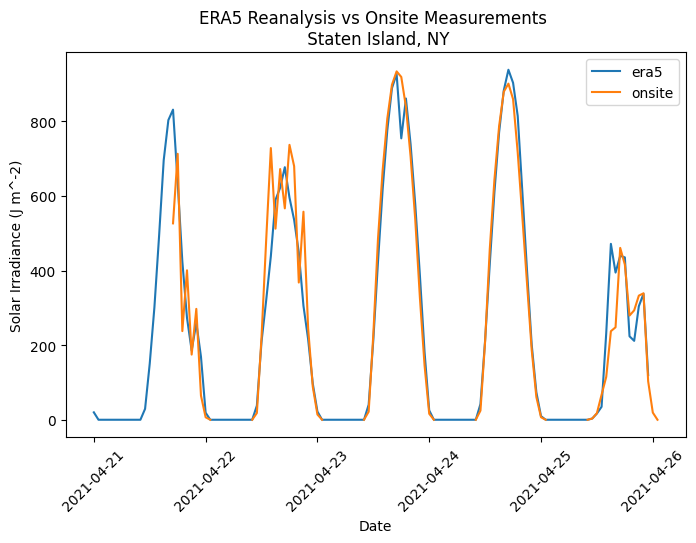

In [32]:
out_staten=outputs_staten.poa.to_dataframe().reset_index().set_index("time").poa
df_staten = staten_pv.to_dataframe().reset_index().set_index("time")
df_staten.t2m = (df_staten.t2m - 273.15) * 9/5 + 32
plt.figure(figsize=(8,5))
plt.plot(df_staten["ssrd"][110*24:115*24]/3600,label="era5")
plt.plot(out_staten[:11*10],label="onsite")
plt.xticks(rotation=45)
plt.legend()
plt.ylabel("Solar Irradiance (J m^-2)")
plt.xlabel("Date")
plt.title("ERA5 Reanalysis vs Onsite Measurements \n Staten Island, NY")

In [12]:
### Process downloaded ERA5 Data
##cloud data
#mantua
cloud_21_mantua = xr.open_dataset("data/downloads/inputs_clouds_mantua.nc")
cloud_22_mantua = xr.open_dataset("data/downloads/inputs_clouds_22_mantua.nc")
cloud_mantua = xr.concat([cloud_21_mantua,cloud_22_mantua],dim="time")
cloud_mantua = cloud_mantua.sel(expver=5,time=(pd.to_datetime(cloud_mantua.time) >= dt.datetime(day=21,month=4,year=2021,hour=17))&(pd.to_datetime(cloud_mantua.time) < dt.datetime(day=1,month=8,year=2022)))
cloud_mantua.to_netcdf("data/train/inputs_clouds_mantua.nc")

#west
cloud_21_west = xr.open_dataset("data/downloads/inputs_clouds_west.nc")
cloud_22_west = xr.open_dataset("data/downloads/inputs_clouds_22_west.nc")
cloud_west = xr.concat([cloud_21_west,cloud_22_west],dim="time")
cloud_west = cloud_west.sel(expver=5,time=(pd.to_datetime(cloud_west.time) >= dt.datetime(day=16,month=9,year=2021,hour=17))&(pd.to_datetime(cloud_west.time) < dt.datetime(day=1,month=8,year=2022)))
cloud_west.to_netcdf("data/train/inputs_clouds_west.nc")
#waterford
cloud_21_water = xr.open_dataset("data/downloads/inputs_clouds_water.nc")
cloud_22_water = xr.open_dataset("data/downloads/inputs_clouds_22_water.nc")
cloud_water = xr.concat([cloud_21_water,cloud_22_water],dim="time")
cloud_water = cloud_water.sel(expver=5,time=(pd.to_datetime(cloud_water.time) >= dt.datetime(day=21,month=4,year=2021,hour=17))&(pd.to_datetime(cloud_water.time) < dt.datetime(day=1,month=8,year=2022)))
cloud_water.to_netcdf("data/test/inputs_clouds_water.nc")

##Irradiance
#mantua
input_mantua = xr.open_dataset('data/downloads/inputs_mantua.nc')
input_mantua = input_mantua.sel(time=(pd.to_datetime(input_mantua.time) >= dt.datetime(day=21,month=4,year=2021,hour=17))&(pd.to_datetime(input_mantua.time) < dt.datetime(day=1,month=8,year=2022)))
input_mantua = xr.merge([input_mantua,cloud_mantua])
#input_mantua.to_netcdf("data/train/inputs_mantua.nc")
#input_mantua_pt = input_mantua.sel(latitude=input_mantua.latitude == -75.142).sel(longitude=input_mantua.longitude == 39.7665)
#input_mantua_pt.to_netcdf("data/train/inputs_mantua_pt.nc")
#west
input_west = xr.open_dataset('data/downloads/inputs_west.nc')
input_west = input_west.sel(time=(pd.to_datetime(input_west.time) >= dt.datetime(day=16,month=9,year=2021,hour=17))&(pd.to_datetime(input_west.time) < dt.datetime(day=1,month=8,year=2022)))
input_west = xr.merge([input_west,cloud_west])
#input_west.to_netcdf("data/train/inputs_west.nc")
input_west_pt = input_west.sel(latitude=input_west.latitude == -73.525).sel(longitude=input_west.longitude == 41.1395)
#input_west_pt.to_netcdf("data/train/inputs_west_pt.nc")
#water
input_water = xr.open_dataset('data/downloads/inputs_water.nc')
input_water = input_water.sel(time=(pd.to_datetime(input_water.time) >= dt.datetime(day=21,month=4,year=2021,hour=17))&(pd.to_datetime(input_water.time) < dt.datetime(day=1,month=8,year=2022)))
input_water = xr.merge([input_water,cloud_water])
#input_water.to_netcdf("data/test/inputs_water.nc")
input_water_pt = input_water.sel(latitude=input_water.latitude == -74.882).sel(longitude=input_water.longitude == 39.7545)
#input_water_pt.to_netcdf("data/test/inputs_water_pt.nc")


In [4]:
input_west = xr.open_dataset('data/downloads/inputs_west.nc')
input_west = input_west.sel(time=(pd.to_datetime(input_west.time) >= dt.datetime(day=16,month=9,year=2021,hour=17))&(pd.to_datetime(input_west.time) < dt.datetime(day=1,month=8,year=2022)))
input_west = xr.merge([input_west,cloud_west])
#input_west.to_netcdf("data/train/inputs_west.nc")
input_west_pt = input_west.sel(latitude=input_west.latitude == -73.525).sel(longitude=input_west.longitude == 41.1395)
#input_west_pt.to_netcdf("data/train/inputs_west_pt.nc")

NameError: name 'cloud_west' is not defined

In [14]:
a = xr.open_dataset("data/train/outputs_mantua_pt.nc").to_dataframe()
a[a.poa.isnull()]

,,,poa
time,lat,lon,
2022-03-13 07:00:00,-75.142027,39.766039,NaN
